In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt; plt.rcdefaults()
 


HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Executive Summary

We analyzed two issues with our product:
1. Clients complain about quality not being stable and thus not trusting the service.
2. A large group of editors is not getting tasks.

The main finding is that there is a mismatch between the client domain and editors skill-level:
    * While 49% of tasks are from the travel domain, almost 50% of editors have travel skills of 1.

Next steps:
    * Further investigate the task assignment process.
    * Get more data to do deep dive on task performed by editors.

# Agenda


* Analysis
    * Clients
    * Tickets 
    * Tasks
    * Editors
    
    
* Conclusions
    * Information Requirements
    * Hypothesis
    * Action Items


# Analysis

## Analysis: Clients

In [2]:
#read files
zf = zipfile.ZipFile('./dataset.zip') 
df_tickets = pd.read_csv(zf.open('tickets.csv'),index_col=0)
df_tasks = pd.read_csv(zf.open('tasks.csv'),index_col=0)
df_editors = pd.read_csv(zf.open('editors.csv'),index_col=0)
df_clients = pd.read_csv(zf.open('clients.csv'),index_col=0)



df_tickets=df_tickets.rename(columns={"number_words": "number_words_tickets","id":"ticket_id",
                                      "client_id":"cliente_id_aux","client_id.1":"client_id"})

df_tasks=df_tasks.rename(columns={"id":"task_id","number_words":"number_words_task"})
df_editors=df_editors.rename(columns={"id":"editor_id"})
df_clients=df_clients.rename(columns={"id":"client_id"})



df_ticket_task= pd.merge(df_tickets,df_tasks,how='left',on='ticket_id')
df_ticket_task_client= pd.merge(df_ticket_task,df_clients,how='left',on='client_id')

In [3]:
aux_graph_clientes=df_ticket_task_client[['domain']].drop_duplicates()
aux_graph_clientes['number_clients']=df_ticket_task_client[['client_id','domain']].drop_duplicates().groupby('domain')['client_id'].transform('count')*100/len(df_ticket_task_client[['client_id']].drop_duplicates())
aux_graph_clientes['avg_number_tickets']=df_ticket_task_client[['ticket_id','client_id','domain']].drop_duplicates().groupby('domain')['client_id'].transform('count')/(aux_graph_clientes['number_clients']*50/100)
aux_graph_clientes.index=aux_graph_clientes.domain
aux_graph_clientes=aux_graph_clientes.sort_values(by=['number_clients'],ascending=False)

In [4]:
#Let's look at the data from our clients requests
print("There are "+ str(len(df_ticket_task_client.client_id.unique()))+" active clients.")



There are 50 active clients.


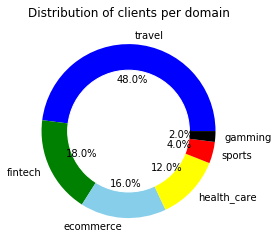

The travel industry is our biggest source of clients (48%), closely followed by fintech (18%) and ecommerce (16%).



In [5]:

# create data
names=aux_graph_clientes.domain 
size=aux_graph_clientes.number_clients
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['blue','green','skyblue','yellow','red','black'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Distribution of clients per domain")
    
plt.show()

print("The travel industry is our biggest source of clients ("+str(int(aux_graph_clientes['number_clients']['travel']))+"%), closely followed by fintech ("+str(int(aux_graph_clientes['number_clients']['fintech']))+"%) and ecommerce ("+str(int(aux_graph_clientes['number_clients']['ecommerce']))+"%).")
print("")

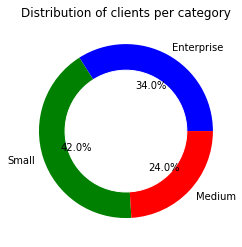

Small clients represent 42% of our client base,  followed by enterprise (34%) and medium (24%).



In [6]:
aux_graph_clientes_ct=df_ticket_task_client[['category']].drop_duplicates()
aux_graph_clientes_ct['number_clients']=df_ticket_task_client[['client_id','category']].drop_duplicates().groupby('category')['category'].transform('count')*100/len(df_ticket_task_client[['client_id']].drop_duplicates())
aux_graph_clientes_ct.index=aux_graph_clientes_ct.category


names=aux_graph_clientes_ct.category 
size=aux_graph_clientes_ct.number_clients
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['blue','green','red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Distribution of clients per category")
    
plt.show()

print("Small clients represent "+str(int(aux_graph_clientes_ct['number_clients']['Small']))+"% of our client base,  followed by enterprise ("+str(int(aux_graph_clientes_ct['number_clients']['Enterprise']))+"%) and medium ("+str(int(aux_graph_clientes_ct['number_clients']['Medium']))+"%).")
print("")

In [7]:
aux_graph_clientes_ct_d=df_clients[['category']].drop_duplicates()
aux_graph_clientes_ct_d.index=aux_graph_clientes_ct_d.category
aux_graph_clientes_ct_d=aux_graph_clientes_ct_d.drop(columns=['category'])
aux_graph_clientes_ct_d['travel']=     df_clients[df_clients['domain']=='travel']    .groupby('category').client_id.count()  
aux_graph_clientes_ct_d['fintech']=    df_clients[df_clients['domain']=='fintech']    .groupby('category').client_id.count() 
aux_graph_clientes_ct_d['ecommerce']=  df_clients[df_clients['domain']=='ecommerce'].groupby('category').client_id.count()   
aux_graph_clientes_ct_d['health_care']=df_clients[df_clients['domain']=='health_care'].groupby('category').client_id.count() 
aux_graph_clientes_ct_d['sports']=     df_clients[df_clients['domain']=='sports'].groupby('category').client_id.count()      
aux_graph_clientes_ct_d['gamming']=     df_clients[df_clients['domain']=='gamming'].groupby('category').client_id.count()    
aux_graph_clientes_ct_d=aux_graph_clientes_ct_d.reindex(['Small','Medium','Enterprise'])
aux_graph_clientes_ct_d=aux_graph_clientes_ct_d.fillna(0)

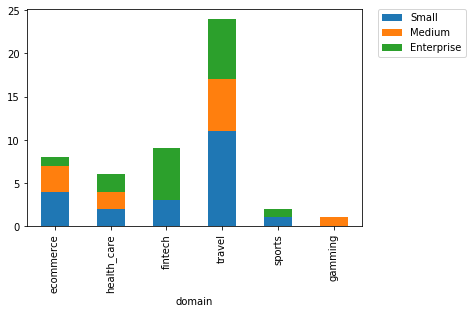

Our travel-industry clients are mostly small companies(45%).
66% of fintech clients are Enterprises.


In [8]:
aux_graph_clientes_ct_dd=df_clients[['domain']].drop_duplicates()
aux_graph_clientes_ct_dd.index=aux_graph_clientes_ct_dd.domain
aux_graph_clientes_ct_dd=aux_graph_clientes_ct_dd.drop(columns=['domain'])
aux_graph_clientes_ct_dd['Small']=     df_clients[df_clients['category']=='Small'].groupby('domain').client_id.count()       
aux_graph_clientes_ct_dd['Medium']=    df_clients[df_clients['category']=='Medium'].groupby('domain').client_id.count()      
aux_graph_clientes_ct_dd['Enterprise']=  df_clients[df_clients['category']=='Enterprise'].groupby('domain').client_id.count()
aux_graph_clientes_ct_dd=aux_graph_clientes_ct_dd.fillna(0)

aux_graph_clientes_ct_dd.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

print("Our travel-industry clients are mostly small companies("+str(int(aux_graph_clientes_ct_dd['Small']['travel']*100/24))+"%).")
print(str(int(aux_graph_clientes_ct_dd['Enterprise']['fintech']*100/9))+"% of fintech clients are Enterprises.")

## Analysis: Tickets

In [9]:
print("There are "+str(int(df_tickets.ticket_id.count()))+" tickets. Each client generated an average of "+str(int(df_ticket_task_client[['client_id','ticket_id']].drop_duplicates()[['client_id','ticket_id']].groupby(['client_id']).count().mean()))+" tickets.")

There are 7788 tickets. Each client generated an average of 155 tickets.


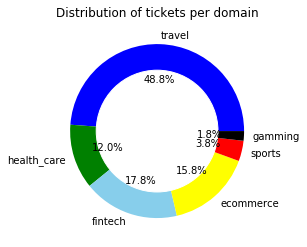

Our biggest source of tickets is the travel industry (49%), closely followed by fintech (18%) and ecommerce (16%).


In [10]:
aux_graph_tkt=df_ticket_task_client[['domain']].drop_duplicates()
aux_graph_tkt['number_tickets']=df_ticket_task_client[['ticket_id','domain']].drop_duplicates().groupby('domain')['ticket_id'].transform('count')*100/len(df_ticket_task_client[['ticket_id']].drop_duplicates())
aux_graph_tkt.index=aux_graph_tkt.domain

# create data
names=aux_graph_tkt.domain 
size=aux_graph_tkt.number_tickets
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['blue','green','skyblue','yellow','red','black'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Distribution of tickets per domain")
    
plt.show()

print("Our biggest source of tickets is the travel industry ("+str(int(round(aux_graph_tkt['number_tickets']['travel'],0)))+"%), closely followed by fintech ("+str(int(round(aux_graph_tkt['number_tickets']['fintech'],0)))+"%) and ecommerce ("+str(int(round(aux_graph_tkt['number_tickets']['ecommerce'],0)))+"%).")


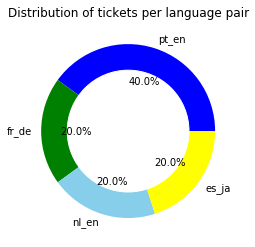

Most translations are from Portuguese to English (40%).Other language pairs (fr_de,es_ja,nl_en) are evenly distributed at 20 % each.


In [11]:
aux_language_pair=df_ticket_task_client[['language_pair']].drop_duplicates()
aux_language_pair['number_tickets']=df_ticket_task_client[['ticket_id','language_pair']].drop_duplicates().groupby('language_pair')['ticket_id'].transform('count')*100/len(df_ticket_task_client[['ticket_id']].drop_duplicates())
aux_language_pair.index=aux_language_pair.language_pair

names=aux_language_pair.language_pair
size=aux_language_pair.number_tickets
    
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['blue','green','skyblue','yellow','red','black'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Distribution of tickets per language pair")
    
plt.show()

print("Most translations are from Portuguese to English ("+str(int(round(aux_language_pair['number_tickets']['pt_en'],0)))+"%).Other language pairs (fr_de,es_ja,nl_en) are evenly distributed at "+str(int(round(aux_language_pair['number_tickets']['es_ja'],0)))+" % each.")


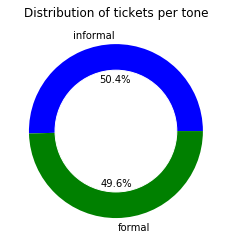

Tickets are evenly distributed (50%) between formal and informal tone.


In [12]:
aux_tone=df_ticket_task_client[['tone']].drop_duplicates()
aux_tone['number_tickets']=df_ticket_task_client[['ticket_id','tone']].drop_duplicates().groupby('tone')['ticket_id'].transform('count')*100/len(df_ticket_task_client[['ticket_id']].drop_duplicates())
aux_tone.index=aux_tone.tone

names=aux_tone.tone
size=aux_tone.number_tickets
    
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['blue','green',],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Distribution of tickets per tone")
    
plt.show()

print("Tickets are evenly distributed ("+str(int(round(aux_tone['number_tickets']['formal'],0)))+"%) between formal and informal tone.")




## Analysis: Tasks

In [13]:
aux_graph_tt=df_ticket_task_client[['domain']].drop_duplicates()
aux_graph_tt['number_tickets']=df_ticket_task_client[['ticket_id','domain']].drop_duplicates().groupby('domain')['ticket_id'].transform('count')
aux_graph_tt['number_tasks']=df_ticket_task_client[['task_id','domain']].drop_duplicates().groupby('domain')['task_id'].transform('count')
aux_graph_tt['avg_tasks']=aux_graph_tt['number_tasks']/aux_graph_tt['number_tickets']
total_tasks=df_ticket_task_client['task_id'].count()
aux_graph_tt['per_tasks']=aux_graph_tt['number_tasks']*100/total_tasks
aux_graph_tt.index=aux_graph_tt.domain

aux_graph_tt=aux_graph_tt.sort_values(by=['number_tasks'])


print("There were "+str(aux_graph_tt['number_tasks'].sum())+" tasks.In average, each ticket is divided in "+str(int(aux_graph_tt['avg_tasks'].mean()))+" tasks.")
print("This trend is stable among all domains. Only sports (+2 tasks) and gamming (-1 task) show some deviations.")


print("Below we can observe the tasks distribution per domain:")


There were 83153 tasks.In average, each ticket is divided in 10 tasks.
This trend is stable among all domains. Only sports (+2 tasks) and gamming (-1 task) show some deviations.
Below we can observe the tasks distribution per domain:


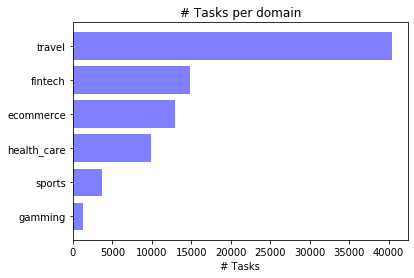

49.0% of tasks come from the travel domain, followed by fintech( 18.0%), ecommerce(16.0%) and healthcare(12.0%)


In [14]:

objects = aux_graph_tt.domain
y_pos = np.arange(len(objects))
performance = aux_graph_tt.number_tasks

plt.barh(y_pos, performance, align='center', alpha=0.5,color=('blue'),tick_label=performance)
plt.yticks(y_pos, objects)
plt.xlabel('# Tasks')
plt.title('# Tasks per domain')


    
plt.show()

print(str(round(aux_graph_tt['per_tasks']['travel'],0))+"% of tasks come from the travel domain, followed by fintech( "+str(round(aux_graph_tt['per_tasks']['fintech'],0))+"%), ecommerce("+str(round(aux_graph_tt['per_tasks']['ecommerce'],0))+"%) and healthcare("+str(round(aux_graph_tt['per_tasks']['health_care'],0))+"%)")

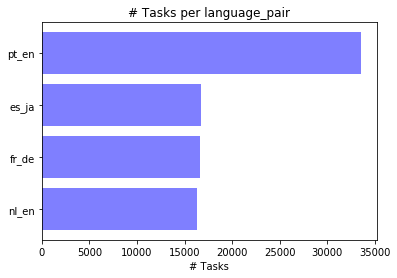

40% of tasks come from the pt_en language_pair, followed by es_ja(20%), fr_de(20%) and nl_en(19%).


In [15]:
aux_graph_lp=df_ticket_task_client[['language_pair']].drop_duplicates()
aux_graph_lp['number_tickets']=df_ticket_task_client[['ticket_id','language_pair']].drop_duplicates().groupby('language_pair')['ticket_id'].transform('count')
aux_graph_lp['number_tasks']=df_ticket_task_client[['task_id','language_pair']].drop_duplicates().groupby('language_pair')['task_id'].transform('count')
aux_graph_lp['avg_tasks']=aux_graph_lp['number_tasks']/aux_graph_lp['number_tickets']
aux_graph_lp.index=aux_graph_lp.language_pair

aux_graph_lp['per_tasks']=aux_graph_lp['number_tasks']*100/total_tasks


aux_graph_lp=aux_graph_lp.sort_values(by=['number_tasks'])


objects = aux_graph_lp.language_pair
y_pos = np.arange(len(objects))
performance = aux_graph_lp.number_tasks

plt.barh(y_pos, performance, align='center', alpha=0.5,color=('blue'),tick_label=performance)
plt.yticks(y_pos, objects)
plt.xlabel('# Tasks')
plt.title('# Tasks per language_pair')


    
plt.show()


print(str(int(aux_graph_lp['per_tasks']['pt_en']))+"% of tasks come from the pt_en language_pair, followed by es_ja("+str(int(aux_graph_lp['per_tasks']['es_ja']))+"%), fr_de("+str(int(aux_graph_lp['per_tasks']['fr_de']))+"%) and nl_en("+str(int(aux_graph_lp['per_tasks']['nl_en']))+"%).")

## Analysis: Editors

In [16]:
print("There are "+str(len(df_editors))+" editors.")

#sns.boxplot(y='quality', x='domain', 
#                 data=pd.melt(df_editors,value_name='quality',var_name='domain'), 
#                 width=0.5,
#                 palette="colorblind")


#plt.title('Editors domain boxplot')

#plt.show()

There are 418 editors.


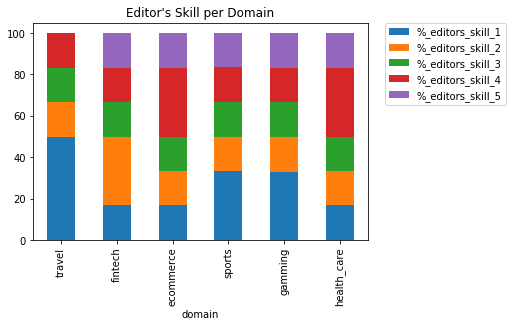

We observe that travel editors skill is very low. 50% of editors have skill=1.
This is a serious issue since 49% of the tasks come from this domain.
Travel is also the only domain with no editors skill=5.


In [17]:
df_editors_s=df_editors.drop(columns=['editor_id'])


df_editors_s=pd.melt(df_editors_s,value_name='quality',var_name='domain')

df_editors_ss=df_editors_s[['domain']].drop_duplicates()
df_editors_ss.index=df_editors_ss.domain
df_editors_ss=df_editors_ss.drop(columns=['domain'])
df_editors_ss['%_editors_skill_1']=df_editors_s[df_editors_s['quality']==1].groupby('domain').count()*100/df_editors.editor_id.count()
df_editors_ss['%_editors_skill_2']=df_editors_s[df_editors_s['quality']==2].groupby('domain').count()*100/df_editors.editor_id.count()
df_editors_ss['%_editors_skill_3']=df_editors_s[df_editors_s['quality']==3].groupby('domain').count()*100/df_editors.editor_id.count()
df_editors_ss['%_editors_skill_4']=df_editors_s[df_editors_s['quality']==4].groupby('domain').count()*100/df_editors.editor_id.count()
df_editors_ss['%_editors_skill_5']=df_editors_s[df_editors_s['quality']==5].groupby('domain').count()*100/df_editors.editor_id.count()


df_editors_ss.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Editor's Skill per Domain")
plt.show()


print("We observe that travel editors skill is very low. "+str(int(round(df_editors_ss['%_editors_skill_1']['travel'],0)))+"% of editors have skill=1.")
print("This is a serious issue since "+str(int(round(aux_graph_tt['per_tasks']['travel'],0)))+"% of the tasks come from this domain.")
print("Travel is also the only domain with no editors skill=5.")

# Conclusions

## Information requirements

### Data
* Missing data 
    * Ticket: Quality and price data are all set to default value (-1).
        * Get correct information about ticket quality and price.
        * Need to disaggregate quality and price data by task.
    * Editors: language proficiency, quality of task, performance a priori.

* Cannot match editors to tasks.

* Need to identify clients and editors that have complaints.


### Processes
* Quality
    * How is quality assessed for each ticket? Is it an average of all translators?
    * How often is editors' performance checked and updated? How often is the performance a priori updated? How is this done? (editors correct other editors?)
    
* Task assignment
    * How are tasks randomly assigned? 
    * How are editors sets defined?
        * Are there any entry/exit conditions for editors to be assigned translations? Example: certain skill level, price, domain.
    * Do different clients require a different quality level? 
    * Do editors select a price that they want to be paid and only receive tasks that we (Unbabel) are willing to pay that price for?
    

## Hypothesis

### Quality problem

* Editors lack proficiency in the translation's domain.
    * Editors have low skills (skill=1) in our main business (travel).

* Lower-skill editors are doing reviews. 

* Is the performance algorithm working properly? Are tasks being assigned to qualified editors?


### Tasks for editors

*  There could be a mismatch between supply (tasks) and demand (editors). This could be due either to: language skills, domain-quality or price.



## Action Items

* Fill in information requirements in order to perform further analysis.

* Search for patterns among clients and editors that have issues.

* Check match between editors skills and tasks available.

* Control performance evolution. See if there is any unusual deviations.

* Understand why our editors have poor travel-domain skills.
